# Sentiment analysis

** Sentiment analysis** (also known as **opinion mining** or **emotion AI**) -  using natural language processing and computational linguistics to systematically identify, extract, quantify, and study affective states and subjective information. 


Affective states?
Subjective information?
Basically it is about determining whether the writer's attitude towards a particular topic, product, etc. is **positive**, **negative**, or **neutral**.


**REFLECT AND WRITE (1)**:  What are the applications of sentiment analysis? Think about modern world and how opinion mining can be used (3-5 sentences). 

**YOUR ANSWER**:

There are different ways to do sentiment analysis. In this tutorial we will look at some:
- Vader (lexicon-based)
- Machine learning (Random Forest algorithm)
- Neural Networks (RNN/LSTM)

It is meant to be an introduction so if you want to learn more about some of these topics you may need to consult some other external resources.

**IF YOU FANCY** (some more advanced stuff): If you want to continue learning about some cutting edge technique check out this tutorial (there is a Colab notebook too) https://curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/

## METHOD 1: (Darth) VADER

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool specifically attuned to sentiments expressed in social media. 


More info: https://github.com/cjhutto/vaderSentiment

**Lexical approach**: it uses words scored as positie and negative, with the scores based on a pre-trained model labeled as such by human reviewers.


From the authors' GitHub page:
"Empirically validated by **multiple independent human judges**, VADER incorporates a "gold-standard" sentiment lexicon that is especially attuned to microblog-like contexts"


The VADER sentiment lexicon is sensitive both the **polarity** (positive/negative) and the **intensity** (how positive/how negative) of sentiments expressed in social media contexts, and is also generally applicable to sentiment analysis in other domains.



In [ ]:
!pip install vaderSentiment


     |████████████████████████████████| 125 kB 6.6 MB/s 


Let's call the sentiment intensity analyser object:

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
sentiment_analyzer_scores("Very nice :(")

Very nice :(---------------------------- {'neg': 0.437, 'neu': 0.138, 'pos': 0.425, 'compound': -0.022}


Let's analyse the result:
**Positive, Negative and Neutral scores**: the proportion of text that falls in the corresponding categories. 
(our sentence is 67% Positive, 33% Neutral and 0% Negative  - these metrics should add up to 1). 

In addition to the words themselves carrying some positive or negative emotions, there are certain aspects of data that imply the change in the emotion magnitude. 

Some of them are: 

- exclamation marks
- capitalisations (especialle ALL CAPS)
- degree modifiers ("very", "marginally")
- emoji
- conjunction "but"

In [ ]:
sentences = ["VADER is smart, handsome, and funny.",  #  positive sentence 
             "VADER is smart, handsome, and funny!",  # punctuation emphasis
             "VADER is very smart, handsome, and funny.", # degree modifiers
             "VADER is VERY SMART, handsome, and FUNNY.",  # ALLCAPS 
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence 
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence 
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons 
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis 
             "Not bad at all"  # Capitalized negation
             ]

Check how VADER handles all these sentences and adjusts sentiment intensity accordingly.

In [ ]:
for i in range(len(sentences)):
    vs = analyser.polarity_scores(sentences[i])
    print("{:-<65} {}".format(sentences[i],  str(vs)))


VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

"The **compound score** is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate".

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence"

https://github.com/cjhutto/vaderSentiment#code-examples

**CODE IT (1)**: Write code to score your own 6 sentences with VADER. Try different types of sentences as in the example above (e.g. with degree modifiers, capitalisation, emoji etc.).


In [ ]:
## YOUR CODE

# Method 2: Machine learning (sklearn) & Random Forest Classifier

Anohter way to do sentiment analysis is using **machine learning** algorithms.  
This notebook is based on the following tutotial: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

- **Data**:  tweets about six US airlines, 
- **Task**: predict whether a tweet contains positive, negative, or neutral sentiment about the airline. 


In [ ]:
!pip install nltk

Let's import packages we are going to need to explore and clean our data before feeding it to a machine learning algorithm.

In [ ]:
import nltk 
import pandas as pd 
import re
import matplotlib.pyplot as plt

Let's load the data from an online source:

In [ ]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

Pandas allows us to look at the first 5 rows to get an idea of what the data looks like. 

In [ ]:
airline_tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Every tweet is identified with the "tweet_id" number and assigned a sentiment ("neutral", "positive", or "negative"), as well as the airline it is related to, and the tweet text. There are other columns too (e.g. date and time, sentiment confidence, reason for a negative comment).  

Our task is a typical **supervised classification task**. Given a labelled data set (tweets are labelled with their sentiments), we will need to build a model which is able to predict whether a tweet (from a test set on which the model hasnt't been trained) is positive, negative, or neutral. 

### Know your data

The first step of any data mining project is to explore the data. 

Here we set up some visualisation parameters (make a chart bigger). 

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


6.0
4.0


Now, let's plot the data from the spreadsheet and explore it in details.

<AxesSubplot:ylabel='airline'>

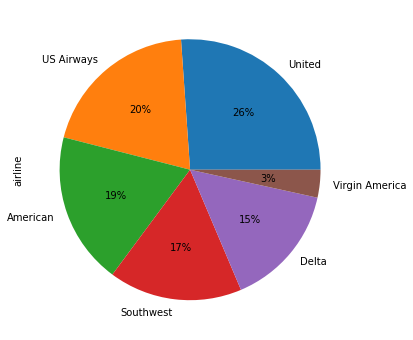

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')


<AxesSubplot:ylabel='airline_sentiment'>

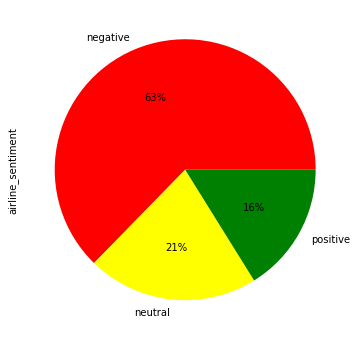

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    colors=["red", "yellow", "green"]
    )


Now we know what airlines are discussed and also that there are way more negative tweets than positive or neutral.

We can also group tweets by airline and see the sentiment breakdown by airline name.

<AxesSubplot:xlabel='airline'>

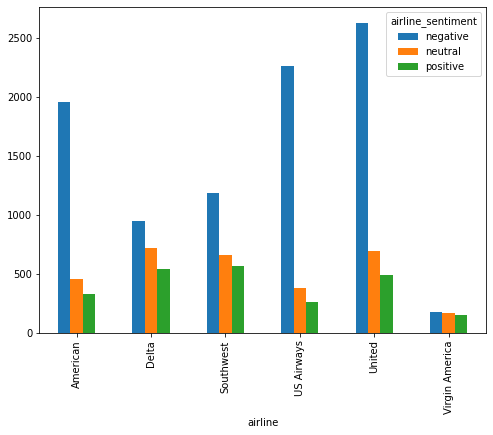

In [ ]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

Install seaborn visualisation library and explore the confidence level of the sentiment labels.

     |████████████████████████████████| 283 kB 6.3 MB/s 


<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

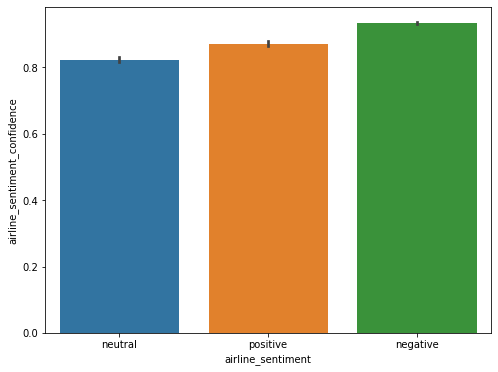

In [ ]:
!pip install seaborn
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)


## Dividing dataset into feature and label sets

A refresher on ML terminology:

- **Features** - input (e.g. a column in your dataset, some property of your training data)
*(Examples: number of rooms, height of a person, income))*
- **Labels** - output (what we are trying to predict)
*(Examples: house price, weight, education level)*



After exploring the data through visualising it, we need to think which columns we will use as input features and which column values we will try to predict.


As our task is to classify tweets into three classes (neg, pos, or neutral), we can decide that the labels (output) will be exactly that - the column with the sentiment values. 

As for the input features, let's think: what will we base our decision on?
Maybe on the tweet date and time? Does the sentiment depend on it? Or on the airline name? 
In fact, no. The input will be the tweet **text** (column 'text') and the label we want to predict is 'airline_sentiment'). Have a look at the code below and make sure you understand how we assign values to the features and labels sets of data using Pandas iloc (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [ ]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

## Preprocessing (cleaning) data

...with our beloved regular expressions:

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

Let's see what has been done here.

1. Removing all the special characters
2. Remove all the single characters left as a result of Step 1.
(e.g. if we remove special character ' from Jack's and replace it with space, we are left with Jack s. Here s has no meaning, so we remove it by replacing all single characters with a space)
3. If we replace all single characters with space, multiple spaces are created. => let's replace all multiple spaces with single spaces 
4. Lowercase everything

## Vectorising text

As we know, machine learning systems only work with numbers, not raw texts. We now have to convert our text data into numerical representation. 

You are already familiar with the **TF-IDF vectoriser**. 

**REFLECT AND WRITE (2)**: what does TF-IDF vectoriser do? How is it different from other vectorising methods?

In [ ]:
nltk.download ('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Let's look at some parameters:
- **max_features** (set to 2500): the vectoriser will only use the 2500 most frequently occurring words to create a bag of words feature vector. 
- **max_df** (set to 0.8): only use the words occuring occur in a maximum of 80% of the documents. 
- **min-df** (set to 7): only use words that occur in at least 7 documents
This is one of the ways to exclude words that may be too common to be useful for our task.


## Dividing data into training and testing sets

- **Training set** - used to train the model
- **Test set**  - used to test the model's performance

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

- **test_size** (set to 0.2): our data set will be split into two sets of 80% (for training) and 20% data (for testing).
- **random_state** parameter is used to ensure that every time you run your code the split will end up in subsets of data containing identical values. It can be set to anything but commonly used value is 0 (which means "I want this code to be reproducible). Some ML folks also like to use 42 (https://www.independent.co.uk/life-style/history/42-the-answer-to-life-the-universe-and-everything-2205734.html). 

## Machine learning in action

Now that we have split our data into training and test sets, we will use a machine learning algorithm to learn from it.
Although we can use any ML algorithm, here we will use **Random Forest**.


![](https://i.pinimg.com/564x/55/cc/a7/55cca7c380856eb2300caf24fd95097c.jpg)

(Image source: https://www.pinterest.com.au/pin/458733912018966676/)

Do you know about **decision trees**?
This algorithm is a supervised learning one. 
We create a training model to be used to predict class or value of target variables by learning **decision rules** inferred from the training data.

The algorithm solves the problem using **tree representation**. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.

**Random forest** algorithm combines the results of multiple decision trees. 

A short video on decision trees and random forests: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=49s

**RandomForestClassifier** class of the **sklearn.ensemble** module can be used to train a model with the random forest algorithm. 
We need to call the **fit** method on the RandomForestClassifier and pass it our **training features and labels** as parameters. 



In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

- **n_estimators** = number of trees in your forest (Random Forest is an ensemble method comprising of creating multiple decision trees).


## Predictions 

Once the model has been trained, we can now use the model to make predictions (is this tweet negative? positive? neutral?). 
To do so, we need to call the **predict** method on the object of the RandomForestClassifier class that we used for training. 



In [ ]:
predictions = text_classifier.predict(X_test)

Done!
Now we need to evaluate the performance of our model.
You may remember the classification metrics we can use, such as:
- confusion matrix
- F1 measure
- accuracy



**CONFUSION MATRIX, PRECISION AND RECALL REFRESHER**
![](https://miro.medium.com/max/4420/1*btcfBuM5Eqqc6rJ3iw3sNQ.png)
(Image source (and a good article on the topic): https://medium.com/@alon.lek/should-i-look-at-precision-recall-or-specificity-sensitivity-3946158aace1)

F-score is a measure of the model's accuracy which combines precision and recall. 
Read more: https://deepai.org/machine-learning-glossary-and-terms/f-score
![]()

![](image-20201117-095812.png)

Let's see how our model performed.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1727  106   37]
 [ 323  253   38]
 [ 138   58  248]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.61      0.41      0.49       614
    positive       0.77      0.56      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7609289617486339


Voila! Our algorithm has achieved an accuracy of 75.30.
There may be ways to improve it (add more data, better feature engineering, model parameter tuning etc.). 
But there are also other ways to do sentiment analysis, so let's move on for now!



## Method 3 - Neural Networks 

Another method we will look into today is using neural networks.
We will train a sentiment classifier for movie reviews in IMDB data set, using **Recurrent Neural Networks**.

Video on RNNs: https://www.youtube.com/watch?v=LHXXI4-IEns

The code below is based on this tutorial: https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e

Let's start with installing Keras and Tensorflow. 
Tensorflow is an open source library for numerical computation that makes machine learning and neural network training and running faster and easier.
Keras, in turn, is a deep learning framework built on top of Tensorflow.

Keras provides some toy datasets (https://keras.io/api/datasets/), including a sentiment analysis one - https://keras.io/api/datasets/imdb/.
"This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers)."

In [ ]:
!pip install keras
!pip install tensorflow
import tensorflow as tf
from keras.datasets import imdb

     |████████████████████████████████| 269 kB 10.4 MB/s 
     |████████████████████████████████| 4.0 MB 19.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44619 sha256=5f32f2348c354df6103cc017d298adc36abdcec392e7277eab0d35ebd022452a
  Stored in directory: /home/jovyan/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built pyyaml
  ^C

ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'tensorflow'

In this dataset, words are indexed by overall frequency in the dataset.
E.g. integer "3" encodes the 3rd most frequent word in the data. 
This helps us do some quick filtering like "only consider the top 10,000 most common words, except the top 20 most common words".

Below we set up the vocabulary size - the 'num_words" parameters will do exactly that, command the functiion to only use the top 5000 most frequently used words in the dataset.

The load function returns a tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
(Read more: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data)

In [ ]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Let's have a look at a sample review and its label.


In [ ]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

The review is represented by a sequence of integers. Each of the integers is a word ID. These IDs were assigned to all individual words.
The label, in turn, is an integer (0 for negative, 1 for positive).


**imdb.get_word_index()** returns the dictionary where words are mapped to ID integers, and we cal always use it to get a word from its index.
to map the review back to the original words.


In [ ]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

In [ ]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

In [ ]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))


To feed our data into RNN, all input documents must have the same length. 
Longer reviews will be trunkated, shorter reviws - padded with zeros. 


In [ ]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Let's design our RNN model for sentiment analysis!
First, we import some layers from Keras.
Reminder: our **input** is a sequence of words (technically, integer word IDs) of maximum length = max_words, and our **output** is a binary sentiment label (0 or 1).


Keras offers an **Embedding layer** that can be used for neural networks on text data.
The input data for this layer must be represented as integers. We have done it already. 
The Embedding layer is initialized with random weights and will learn an embedding for each of the words in the training dataset.







First layer - **Embedding layer** - must have 3 arguments set:

- **input_dim**: size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
- **output_dim**: size of the vector space in which words will be embedded (choose any, try different values)
- **input_length**: length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

Second layer we add is **LSTM - Long Short-Term Memory**.

"Recurrent neural networks are used for "things" that happen recurrently so one thing after the other (e.g. time series, but also words). Long Short-Term Memory networks (LSTM) are a specific type of Recurrent Neural Network (RNN) that are capable of learning the relationships between elements in an input sequence. In our case the elements are words. So our next layer is an LSTM layer with 100 memory units".
(https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks)


More about LSTM: http://colah.github.io/posts/2015-08-Understanding-LSTMs/
And an illustrated guide here: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21


The output of the embedding layer is fed to the LSTM layer. 
Finally, there is a Dense layer with Sigmoid activation function which essentially does the class prediction. 

In [ ]:
from keras import Sequential #Sequential model is a sequence of layers
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
# we have initialised a Sequential model and now start adding layers:
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Let's now compile our model. We specify the **loss function** and **optimizer** we want to use for training, and any **evaluation metrics** we want to measure. 

In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

When the model is compiled, we can start training. 
**Batch size** and **number of training epochs** have to be specified: together with our model architecture these parameteres will determine the training time.

Training may take a while - be patient and relax :)

During model training we need to observe the loss function: it should constantly be going down. It means that our model is improving. 
We show the model our dataset 3 times (**epochs** parameter). 
The **batch size** (we set it to 64) defines how many reviews (data samples) the model will see at once. 

In [ ]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

The model is trained!
Let's check how well it performs on unseen test data.

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

There are several ways in which we can build the model. We can experiments with different layers and parameters while considering such factors as training time and the possibility of overfitting. 


**CODE IT (2)**: experiment with a different network architecture and parameter tuning and see if  you can get a more accurate sentiment classification model.

Examples of what you can try (choose any):

- add Flatten layer before the final Dense one with model.add(Flatten())
- replace LSTM with SimpleRNN with *model.add(layers.SimpleRNN(15))*
- change number of epochs
- change number of vector dimensions (embedding size)
- change batch size
- change number of LSTM or SimpleRNN units



In [ ]:
#YOUR CODE (there is no right answer)